# Learning Algorothm

The agent is trained using an algorithm based on DDPG (https://arxiv.org/abs/1509.02971). DDPG is an actor-critic algorithm, in which the actor is responsible for determining the action values based on the state input while the critic is responsible for estimating the discounted cumulative reward and evaluating the actions taken by the actor. The experience, which consists of state, actions, reward, next state, and a flag indicating the end of the episode, is added to the replay buffer every step. The local actor and critic models are updated 10 times every 20 steps using experiences randomly sampled from the replay buffer. The target actor and critic models are used to compute the target cumulative reward and are updated slowly using soft update to staiblize learning. In order to promote exploration, noise sampled from a Gaussian distribution is added to the action values generated by the local actor. The standard deviation of the Gaussian distribution is decreased every step so that the action values are generated more deterministically as the actor improves its ability to choose the optimal action values.

### Hyperparameters

The following hyperparameter values were chosen:

- replay buffer size = 1e6
- minibatch size = 256
- discount factor = 0.99
- parameter for controlling soft update (TAU) = 1e-3 
- learning rate of the actor = 1e-4
- learning rate of the critic = 1e-3
- weight decay = 0
- noise decay = 0.99

# Model Architecture

The actor model consists of an input layer, one hidden layer, and an output layer. The hidden layer is a 256-unit fully-connected layer with ReLU activation. The output layer has four outputs, which correspond to the four action values, with a tanu activation.

The critic model consists of an input layer, three hidden layers, and an output layer. The first hidden layer is a 256-unit fully-connected layer, which takes the state as its input. The second hidden layer is a 256-unit fully-connected layer, which takes the actions and the output of the first hidden layer as its input. The third hidden layer is a 128-unit fully-connected layer. All of the hidden layers use leaky ReLU as their activation function. The output layer has one output, which is the estimated discounted cumulative reward.

The final layer weights and biases of both the actor and critic are initialized from a uniform distribution $U(-3e^{-3}, 3e^{-3})$ to ensure the initial outputs for the actor and critic were near zero. The other layers were initialized from uniform distributions $U(-1/\sqrt{f}, 1/\sqrt{f})$ where $f$ is the fan-in of the layer.

# Collaboration and Competition

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.16 which is incompatible.


The environment is already saved in the Workspace and can be accessed at the file path provided below. 

In [2]:
from unityagents import UnityEnvironment
import numpy as np

env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.65278625 -1.5        -0.          0.
  6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [5]:
for i in range(5):                                         # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: 0.04500000085681677
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291


When finished, you can close the environment.

In [6]:
#env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

In [7]:
import train
import importlib
importlib.reload(train)
import sys

In [8]:
solved, scores = train.train_agent(env, 10000)

Episode 0	Score: 0.00	Last 10 Scores: 0.00	Running Average: 0.00
Episode 1	Score: 0.00	Last 10 Scores: 0.00	Running Average: 0.00
Episode 2	Score: 0.00	Last 10 Scores: 0.00	Running Average: 0.00
Episode 3	Score: 0.00	Last 10 Scores: 0.00	Running Average: 0.00
Episode 4	Score: 0.00	Last 10 Scores: 0.00	Running Average: 0.00
Episode 5	Score: 0.10	Last 10 Scores: 0.02	Running Average: 0.02
Episode 6	Score: 0.00	Last 10 Scores: 0.01	Running Average: 0.01
Episode 7	Score: 0.10	Last 10 Scores: 0.03	Running Average: 0.03
Episode 8	Score: 0.00	Last 10 Scores: 0.02	Running Average: 0.02
Episode 9	Score: 0.00	Last 10 Scores: 0.02	Running Average: 0.02
Episode 10	Score: 0.00	Last 10 Scores: 0.02	Running Average: 0.02
Episode 11	Score: 0.10	Last 10 Scores: 0.03	Running Average: 0.03
Episode 12	Score: 0.00	Last 10 Scores: 0.03	Running Average: 0.02
Episode 13	Score: 0.00	Last 10 Scores: 0.03	Running Average: 0.02
Episode 14	Score: 0.00	Last 10 Scores: 0.03	Running Average: 0.02
Episode 15	Score: 0.

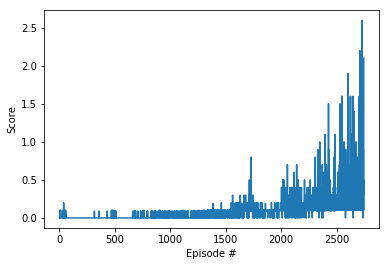

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

evaluate trained agent

Episode 0	Score: 0.80	Last 10 Scores: 0.80	Running Average: 0.80
Episode 1	Score: 0.10	Last 10 Scores: 0.45	Running Average: 0.45
Episode 2	Score: 1.10	Last 10 Scores: 0.67	Running Average: 0.67
Episode 3	Score: 1.00	Last 10 Scores: 0.75	Running Average: 0.75
Episode 4	Score: 2.60	Last 10 Scores: 1.12	Running Average: 1.12


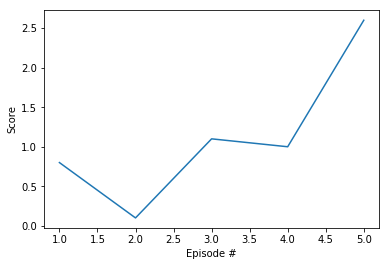

In [10]:
import evaluate
importlib.reload(evaluate)

if solved:
    print("evaluate trained agent\n")
    scores = evaluate.evaluate_agent(env, num_episodes=5)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(1, len(scores)+1), scores)
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.show()